## DEMO: Visualizing waves  

In [2]:
import numpy as np  
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive
import scipy  
from scipy.constants import physical_constants, hbar, h, c, k, m_e, Rydberg, e, N_A

%matplotlib inline
%config InlineBackend.figure_format='retina'

### Standing and traveling waves in 1D

We begin by plotting a simple periodic function using numpy (np) and matplotlib.pyplot (plt) 

$$y = \sin(kx)=\sin\left(\frac{2\pi}{\lambda} x\right)$$

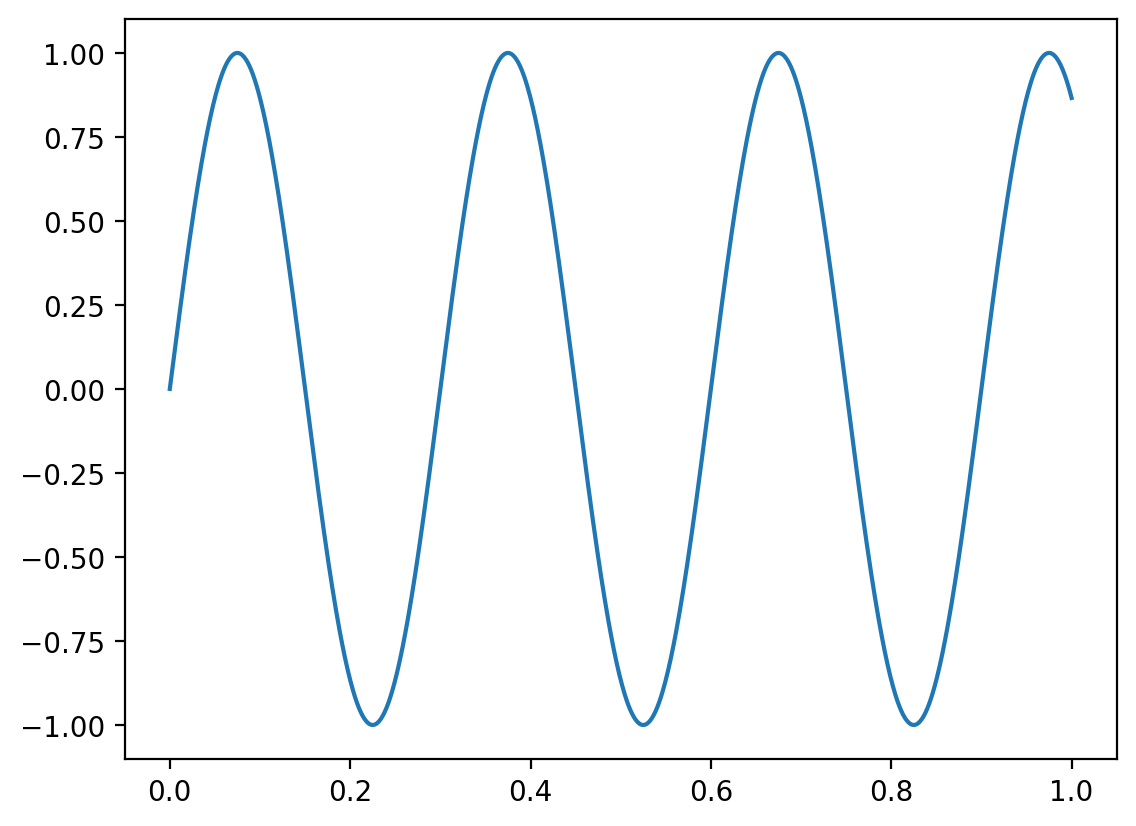

In [2]:
L=0.3            # Try different wavelengths

x = np.linspace(0.0, 1.0, 1000)

y = np.sin(2 * np.pi * x/L)

plt.plot(x, y)

**By putting above example inside a python function will make wavelength exploration convenient**

In [50]:
def wave(L=2):
    
    x = np.linspace(0.0, 1.0, 1000)
    y = np.sin(2*np.pi * x/L)

    plt.plot(x, y, label=f'l={L}')
    
    plt.xlabel('x')
    plt.xlabel('y')
    plt.legend()
    plt.title('Sine waves')
    plt.show()

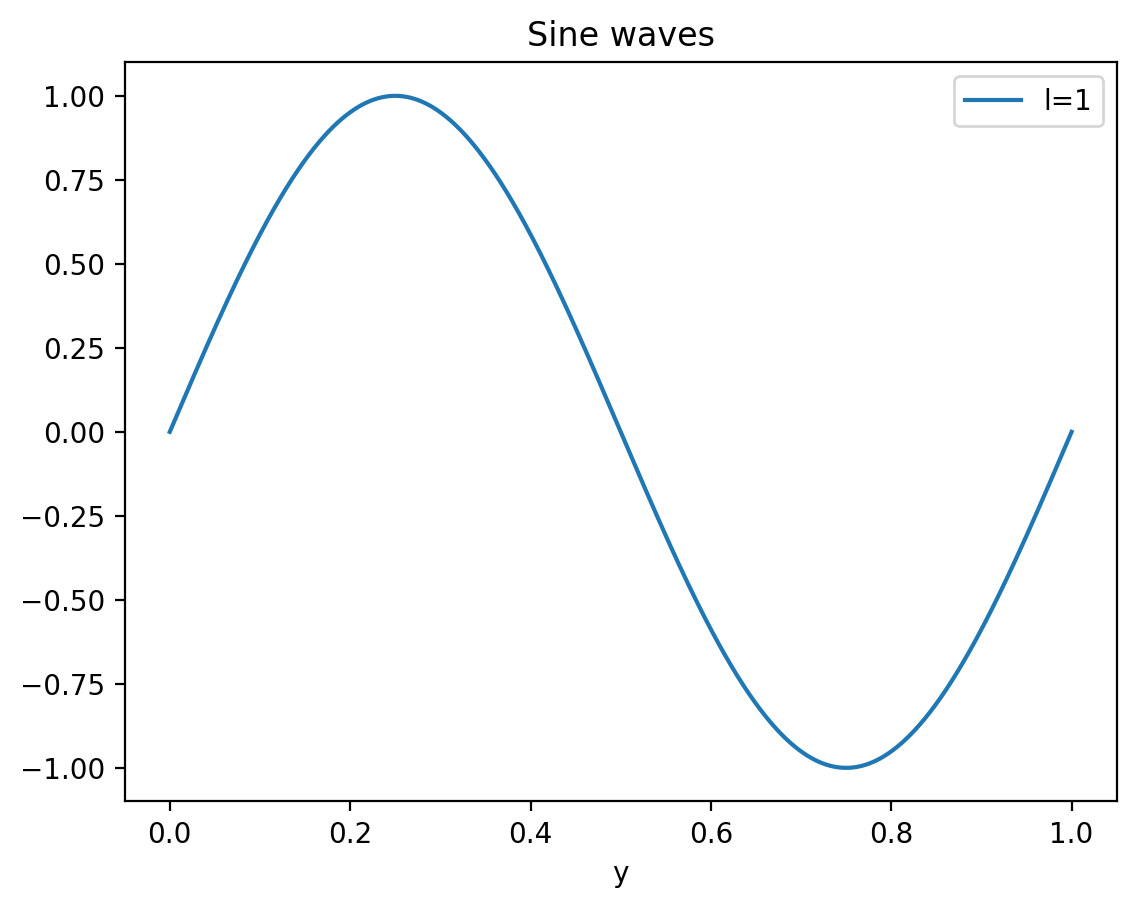

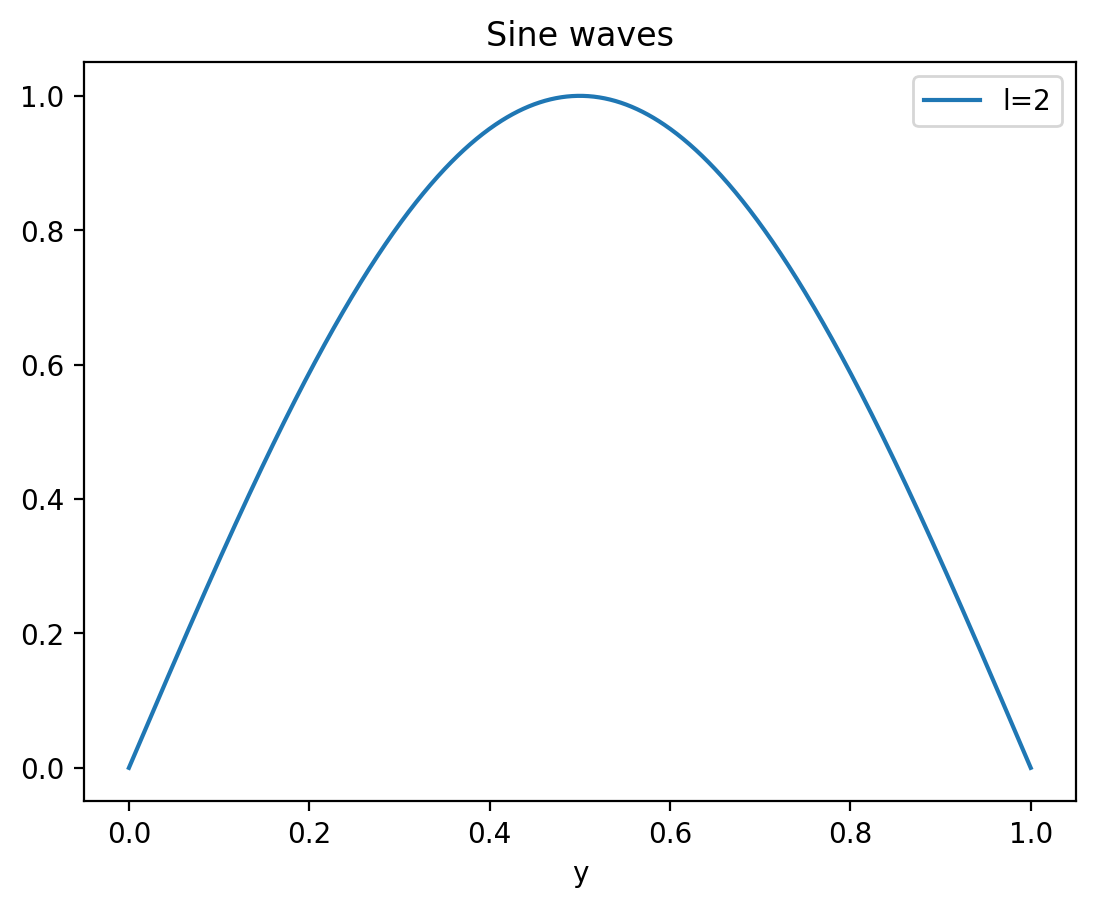

In [53]:
# Now try comparing three different wavelengths
wave(1)
wave(2)

### Interact with waves

- By adding ``@widgets.interact(parameters=(init,final))`` to our functions we can interactively vary various parameters of the function using dash knobs. 
- Below we illustrate this on the example of our newly created function **wavef(L)** where we vary the length of guitar string L as a parameter between values of 0.1 and 2. Try changing these numbers

In [54]:
interactive(wave, L=(0.1, 2))

interactive(children=(FloatSlider(value=2.0, description='L', max=2.0, min=0.1), Output()), _dom_classes=('wid…

### Traveling wave as a function of time and position

In [55]:
import plotly.express as px

# Parameters for the traveling wave
A = 1.0         # Amplitude
wavelength = 2.0 * np.pi
k = 2 * np.pi / wavelength  # Wave number
T = 2.0 * np.pi
omega = 2 * np.pi / T  # Angular frequency
phi = 0.0       # Phase

# Create a grid of x and t values
x = np.linspace(0, 2 * np.pi, 50)
t = np.linspace(0, 2 * np.pi, 50)
X, T = np.meshgrid(x, t)

# Calculate the wave amplitude for each combination of x and t
Y = A * np.sin(k * X - omega * T + phi)

px.scatter_3d(x=X.ravel(), 
              y=T.ravel(), 
              z=Y.ravel(), 
              color = Y.ravel(),
              labels={'x': 'Position', 'y': 'Time', 'z': 'Amplitude'},
              width=1000, 
              height=1000)

## Traveling, standing waves and wave interference 

In [42]:
@interact(k=(2, 20), t=(0,50.0,0.1), phi=(0, 2*np.pi, np.pi/8))
def wavef2(k=10, t=0, phi=0):

    v=1         #velocity of waves
    
    x     = np.linspace(0, 1., 1000)
    
    wave1 = np.sin(k*(x-v*t)) 
    
    wave2 = np.sin(k*(x-v*t)+phi)    #try flipping the direction of velocity to get standing wave
    
    plt.plot(x, wave1,   lw=2, color='blue')
    plt.plot(x, wave2,  lw=2,  color='green')
    plt.plot(x, wave1+wave2, lw=3,  color='red')
    
    plt.ylim([-2.5, 2.5])
    plt.legend(['Wave1','Wave2','Wave1+Wave2'])
    plt.grid('on')
    plt.show()

interactive(children=(IntSlider(value=10, description='k', max=20, min=2), FloatSlider(value=0.0, description=…

## Normal modes of 1D guitar string

In [31]:
@interact(n=(1,10))
def wavef(n=1):
    
    L=1
    
    x = np.linspace(0, +1., 1000)
    
    y = np.sin(n*np.pi * x/L)
    
    plt.plot(x, y, lw=3, color='red')
    
    plt.grid('on')
    plt.show()

interactive(children=(IntSlider(value=1, description='n', max=10, min=1), Output()), _dom_classes=('widget-int…

## 1D guitar vibrations as linear combination of normal modes

For simplicity we will combine two modes with two different mode numbers and shifted with resepct to each ophter by a phase $\phi$.  

$$Mode_1 = cos(\omega t) \cdot sin(n_1\pi  \cdot \frac{x}{L})$$

$$Mode_2 = cos(\omega t+\phi) \cdot sin(n_2\pi  \cdot \frac{x}{L})$$

In [27]:
def wavef(n1=1, n2=1, phi=0,t=0):
    
    L=1
    omega=1
     
    x = np.linspace(0, +1., 50)
    
    mode1 = np.cos(omega*t) * np.sin(n1*np.pi * x/L)
    
    mode2 = np.cos(omega*t + phi) * np.sin(n2*np.pi * x/L)
    
    plt.plot(x, mode1+mode2, lw=5, color='orange')
    plt.ylim([-2.5, 2.5])
    plt.grid('on')
    plt.show()

In [30]:
interactive(wavef, n1=(1,5), n2=(1,5), phi=(0,2*np.pi), t=(0,100,0.1) )

interactive(children=(IntSlider(value=1, description='n1', max=5, min=1), IntSlider(value=1, description='n2',…

## Normal modes of 2d membrane

In [6]:
@interact(n=(1,10),m=(1,10))
def membrane(n=1, m=1): 
    
    # Constants
    Lx, Ly = 1.0, 1.0  # Dimensions of the rectangular region
    c = 1.0            # Wave speed
    
    # Create a spatial grid
    Nx, Ny = 100, 100
    x, y  = np.linspace(0, Lx, Nx), np.linspace(0, Ly, Ny)
    X, Y  = np.meshgrid(x, y)

    # Compute spatial part of the normal mode
    spatial_part = np.sin(m * np.pi * X / Lx) * np.sin(n * np.pi * Y / Ly)
   
    fig, ax =plt.subplots()
    ax.contourf(X, Y, spatial_part, 40, cmap='RdBu')

interactive(children=(IntSlider(value=1, description='n', max=10, min=1), IntSlider(value=1, description='m', …

## Vibrations of square 2D membrane as a linear combination of normal modes

In [15]:
def membrane(n1=1, m1=1, n2=1, m2=1, t=0): 
    
    omega=1
    
    L=1                       # size of membrane
    N=40                      # number of grid points along X and Y
    
    x = np.linspace(0,L,N)
    y = np.linspace(0,L,N)
    X,Y = np.meshgrid(x,y)   # create 2D mesh of points along X and Y
     
    mode1 = np.cos(omega*t) * np.sin(n1*np.pi*X/L) * np.sin(m1*np.pi*Y/L) 
     
    mode2 = np.cos(omega*t) * np.sin(n2*np.pi*X/L) * np.sin(m2*np.pi*Y/L) 
   
        
    fig, ax = plt.subplots(figsize=(9,6))            
    ax      = plt.axes(projection='3d')   # Making a 3D plot     
   
    ax.set_zlim([-2.0, 2.0])
    ax.plot_surface(X, Y, mode1+mode2, cmap='RdYlBu') #Do the Plot 
    plt.show()

In [17]:
interactive(membrane, n1=(1,10), m1=(1,10), n2=(1,10), m2=(1,10), t=(0,100))

interactive(children=(IntSlider(value=1, description='n1', max=10, min=1), IntSlider(value=1, description='m1'…